<a href="https://colab.research.google.com/github/Osakana7777777/GNN_seminar/blob/main/pyg_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Geometric(PyG)
https://pytorch-geometric.readthedocs.io/en/stable/

本ノートブックでは，PyGをColabで試しに動かすことを目標にする．


In [1]:
# まずはこれが基本
# !pip install torch_geometric：少し時間がかかる
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-k4iarhnw
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-k4iarhnw
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit fbafbc4fc9181e8759ec1f39d9618992793b5fe1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.6.0-py3-none-any.whl size=1122975 sha256=a3ebc1d2de80706168e0e77260702640fbc15f1563ed95e5f58a4bc7e5ae0c37
  Stored in directory: /tmp/pip-ephem-wheel-cache-ltq8751a/wheels/d3/78/eb/9e26525b948d19533f1688fb6c209cec8a0ba793d39b49ae8f
Successfully built torch-geometric


In [2]:
# オプションのライブラリをインストール
# 例：node2vecを実装するときなどに必要

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install pyg-lib -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-${TORCH}.html

# !pip install pyg-library torch-scatter torch-sparse torch-cluster torch-spline-conv：非推奨．めちゃくちゃ時間かかる

2.3.0+cu121
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 89.3 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.1/947.1 kB 20.2 MB/s eta 0:00:00


## グラフの表現

スライドで出てきたグラフを描いてみよう．

Dataクラスで，グラフをPyGで扱える形式にする．

描画は，NetworkXというライブラリを使う（PyGのグラフをNetworkX形式に変換する）．

In [16]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2, 2, 0, 1, 3, 1, 4],
                           [1, 0, 2, 1, 0, 2, 3, 1, 4, 1]], dtype=torch.long)
x = torch.tensor([[1], [2], [3], [4], [5]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

Dataクラスの引数

* x: (頂点数×頂点特徴量の次元)
* edge_index: (2×辺の数)


In [17]:
data

Data(x=[5, 1], edge_index=[2, 10])

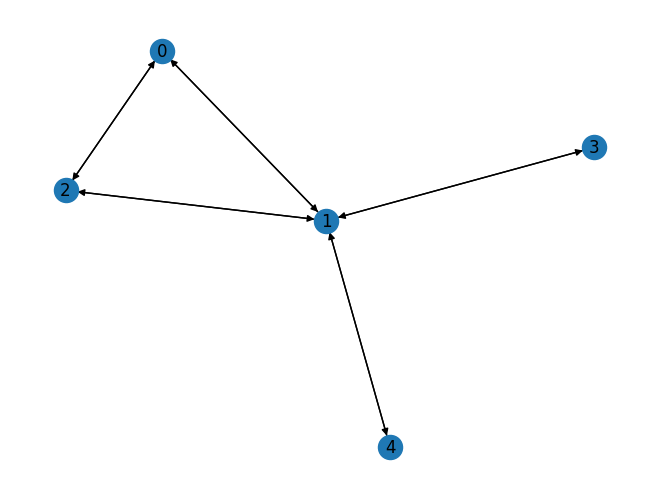

In [18]:
# 実行するたびにグラフの配置が変わる->固定する方法は？？

from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

G = to_networkx(data)
nx.draw(G, with_labels=True)
plt.show()


In [19]:
G.order()

5

In [22]:
# 隣接行列
nx.adjacency_matrix(G).todense()

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

## データセットの例

https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html に表示されている．

KarateClub()
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


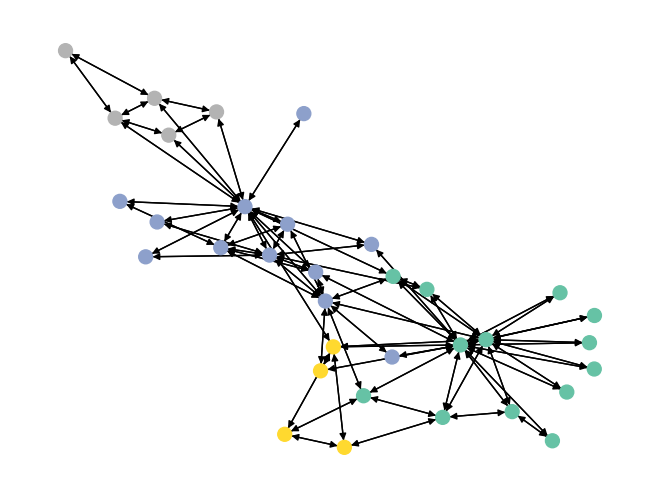

In [10]:
# KarateClubデータセット
import torch
from torch_geometric.datasets import KarateClub, Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

dataset = KarateClub()
print(dataset)
data = dataset[0]

print(data)

G = to_networkx(data)
nx.draw(G, with_labels=False, node_color=data.y, node_size=100, cmap=plt.get_cmap('Set2'))
plt.show()

In [12]:
print(f"ノード：{data.x}\n{data.x.shape}")
print(f"ラベル：{data.y}\n{data.y.shape}")

ノード：tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
torch.Size([34, 34])
ラベル：tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])
torch.Size([34])


# 古典的なグラフ機械学習手法

ここでは，node2vecを実装する．

参考：https://github.com/pyg-team/pytorch_geometric/blob/master/examples/node2vec.py

獲得したノード埋め込みをt-SNEで圧縮して可視化している．

Processing...
Done!


Epoch: 001, Loss: 7.7630, Acc: 0.1620
Epoch: 002, Loss: 5.4430, Acc: 0.2010
Epoch: 003, Loss: 4.1593, Acc: 0.2320
Epoch: 004, Loss: 3.2522, Acc: 0.2820
Epoch: 005, Loss: 2.5992, Acc: 0.3410
Epoch: 006, Loss: 2.1285, Acc: 0.3760
Epoch: 007, Loss: 1.7923, Acc: 0.4210
Epoch: 008, Loss: 1.5455, Acc: 0.4480
Epoch: 009, Loss: 1.3643, Acc: 0.4850
Epoch: 010, Loss: 1.2343, Acc: 0.5190
Epoch: 011, Loss: 1.1419, Acc: 0.5410
Epoch: 012, Loss: 1.0746, Acc: 0.5680
Epoch: 013, Loss: 1.0239, Acc: 0.5830
Epoch: 014, Loss: 0.9866, Acc: 0.5900
Epoch: 015, Loss: 0.9584, Acc: 0.6110
Epoch: 016, Loss: 0.9365, Acc: 0.6290
Epoch: 017, Loss: 0.9196, Acc: 0.6350
Epoch: 018, Loss: 0.9053, Acc: 0.6350
Epoch: 019, Loss: 0.8943, Acc: 0.6340
Epoch: 020, Loss: 0.8856, Acc: 0.6370
Epoch: 021, Loss: 0.8780, Acc: 0.6350
Epoch: 022, Loss: 0.8716, Acc: 0.6460
Epoch: 023, Loss: 0.8664, Acc: 0.6500
Epoch: 024, Loss: 0.8615, Acc: 0.6500
Epoch: 025, Loss: 0.8580, Acc: 0.6650
Epoch: 026, Loss: 0.8544, Acc: 0.6690
Epoch: 027, 

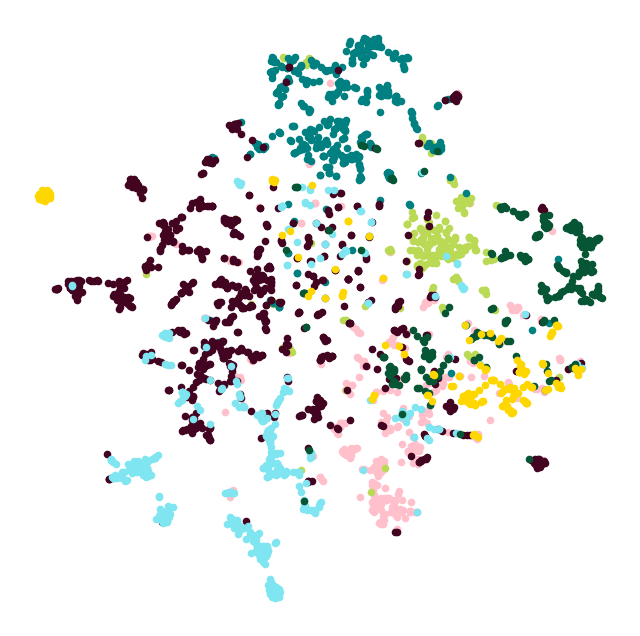

In [13]:
# reference: https://github.com/pyg-team/pytorch_geometric/blob/master/examples/node2vec.py
import os.path as osp
import sys

import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

from torch_geometric.datasets import Planetoid, KarateClub
from torch_geometric.nn import Node2Vec

dataset = Planetoid("/content", name='Cora')
data = dataset[0]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(
    data.edge_index,
    embedding_dim=128,
    walk_length=50,
    context_size=10,
    walks_per_node=10,
    num_negative_samples=1,
    p=1.0,
    q=1.0,
    sparse=True,
).to(device)

num_workers = os.cpu_count()
loader = model.loader(batch_size=128, shuffle=True, num_workers=num_workers)
optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)


def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(
        train_z=z[data.train_mask],
        train_y=data.y[data.train_mask],
        test_z=z[data.test_mask],
        test_y=data.y[data.test_mask],
        max_iter=150,
    )
    return acc


for epoch in range(1, 101):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Acc: {acc:.4f}')


@torch.no_grad()
def plot_points(colors):
    model.eval()
    z = model().cpu().numpy()
    z = TSNE(n_components=2).fit_transform(z)
    y = data.y.cpu().numpy()

    plt.figure(figsize=(8, 8))
    for i in range(dataset.num_classes):
        plt.scatter(z[y == i, 0], z[y == i, 1], s=20, color=colors[i])
    plt.axis('off')
    plt.show()


colors = [
    '#ffc0cb', '#bada55', '#008080', '#420420', '#7fe5f0', '#065535', '#ffd700'
]
plot_points(colors)

完璧ではないが，同じラベルのものが近くになっている．